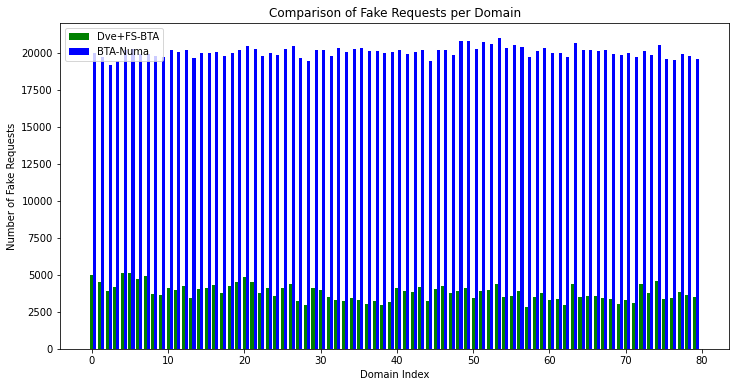

Fake requests per domain for Dve+FS-BTA: [4974, 4522, 3888, 4170, 5108, 5154, 4752, 4908, 3722, 3604, 4126, 3982, 4234, 3434, 4054, 4094, 4282, 3756, 4242, 4528, 4876, 4546, 3752, 4092, 3594, 4122, 4360, 3220, 2988, 4128, 3952, 3494, 3270, 3206, 3402, 3324, 3020, 3240, 2940, 3152, 4118, 3940, 3832, 4186, 3232, 4040, 4260, 3800, 3936, 4138, 3414, 3904, 3986, 4362, 3476, 3568, 3914, 2854, 3510, 3800, 3322, 3372, 2968, 4356, 3526, 3558, 3556, 3466, 3352, 3016, 3278, 3090, 4382, 3750, 4574, 3382, 3422, 3858, 3666, 3488]
Fake requests per domain for BTA Numa: [19996, 19708, 19178, 19452, 20196, 20236, 19932, 19942, 19778, 19740, 20184, 20050, 20208, 19682, 20006, 20012, 20090, 19794, 19976, 20176, 20498, 20252, 19790, 20028, 19882, 20288, 20474, 19682, 19462, 20186, 20174, 19772, 20328, 20094, 20270, 20306, 20112, 20134, 19972, 20096, 20184, 19950, 20030, 20172, 19484, 20194, 20212, 19886, 20800, 20796, 20282, 20716, 20622, 20998, 20302, 20520, 20410, 19740, 20138, 20364, 20000, 20026, 1975

In [1]:
# Fake Request Performance

import matplotlib.pyplot as plt

def read_and_plot_fake_requests_combined(file_path):
    # Open and read the file
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Initialize lists to hold the fake request values
    fake_requests_dve = []
    fake_requests_bta = []

    # Flags to check the current section
    in_dve_section = False
    in_bta_section = False

    # Loop through each line and extract the fake request values
    for line in lines:
        if 'Dve+FS-BTA Stats:' in line:
            in_dve_section = True
            in_bta_section = False
        elif 'BTA Numa Stats:' in line:
            in_dve_section = False
            in_bta_section = True

        if in_dve_section and 'fake requests:' in line:
            requests = int(line.split(':')[-1].strip())
            fake_requests_dve.append(requests)
        elif in_bta_section and 'fake requests:' in line:
            requests = int(line.split(':')[-1].strip())
            fake_requests_bta.append(requests)

    # Create a bar chart for the fake requests in both stats
    fig, ax = plt.subplots(figsize=(12, 6))
    x = range(len(fake_requests_dve)) 
    ax.bar(x, fake_requests_dve, width=0.4, color='green', label='Dve+FS-BTA')
    ax.bar([p + 0.4 for p in x], fake_requests_bta, width=0.4, color='blue', label='BTA-Numa')
    
    ax.set_xlabel('Domain Index')
    ax.set_ylabel('Number of Fake Requests')
    ax.set_title('Comparison of Fake Requests per Domain')
    ax.legend()

    plt.show()

    return fake_requests_dve, fake_requests_bta

# Path to the uploaded file
file_path = "C://Users/parks/Downloads/BASELINE8domains_16banks_lowCycleStep_8threads_30write_50channel.txt"

# Call the function to read and plot data
fake_requests_data_dve, fake_requests_data_bta = read_and_plot_fake_requests_combined(file_path)
print("Fake requests per domain for Dve+FS-BTA:", fake_requests_data_dve)
print("Fake requests per domain for BTA Numa:", fake_requests_data_bta)

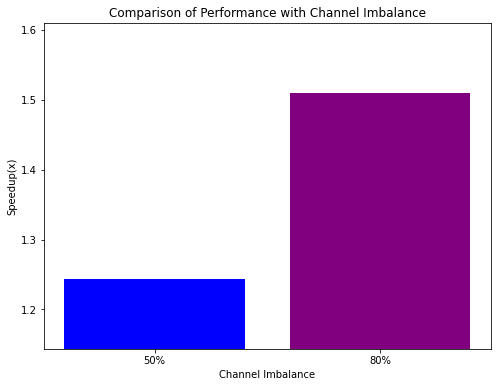

Average Efficiency Factor from File 1: 1.2436595715431367
Average Efficiency Factor from File 2: 1.5102125867822331


In [2]:
#Channel Imbalance Performance

import re
import matplotlib.pyplot as plt

def extract_factors(file_path):
    """Extract efficiency factors from the given file."""
    with open(file_path, 'r') as file:
        content = file.read()
    factors = re.findall(r'Dve\+FS:BTA is ([\d\.]+) times faster than BTA', content)
    return [float(factor) for factor in factors]

def compare_factors(file_path1, file_path2):
    # Extract factors from both files
    factors1 = extract_factors(file_path1)
    factors2 = extract_factors(file_path2)

    # Calculate the averages
    average_factor1 = sum(factors1) / len(factors1) if factors1 else 0
    average_factor2 = sum(factors2) / len(factors2) if factors2 else 0

    # Data for plotting
    categories = ['50%', '80%']
    averages = [average_factor1, average_factor2]

    # Create a bar chart
    plt.figure(figsize=(8, 6))
    plt.bar(categories, averages, color=['blue','purple'])
    plt.xlabel('Channel Imbalance')
    plt.ylabel('Speedup(x)')
    plt.title('Comparison of Performance with Channel Imbalance')
    plt.ylim(min(averages) - 0.1, max(averages) + 0.1)  # Dynamically adjust y-axis for clarity
    plt.show()

    return average_factor1, average_factor2

# Paths to the uploaded files
file_path1 = "C://Users/parks/Downloads/BASELINE8domains_16banks_lowCycleStep_8threads_30write_50channel.txt"
file_path2 = "C://Users/parks/Downloads/8domains_16banks_lowCycleStep_8threads_30write_80channel.txt"

# Extract the factors, compute the averages, and compare
average_factor1, average_factor2 = compare_factors(file_path1, file_path2)
print(f"Average Efficiency Factor from File 1: {average_factor1}")
print(f"Average Efficiency Factor from File 2: {average_factor2}")

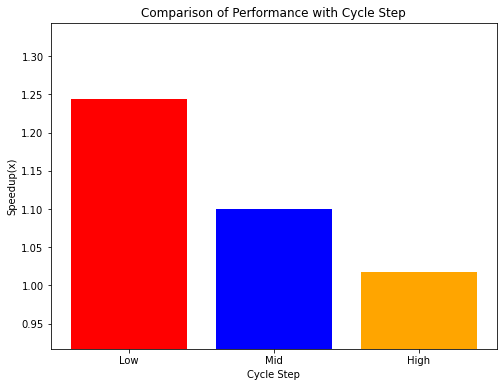

Average Efficiency Factor from File 1: 1.2436595715431367
Average Efficiency Factor from File 2: 1.0995035855775555
Average Efficiency Factor from File 3: 1.017164883997841


In [3]:
# Compare 3-cases [Cycle-step]

import re
import matplotlib.pyplot as plt

def extract_factors(file_path):
    """Extract efficiency factors from the given file."""
    with open(file_path, 'r') as file:
        content = file.read()
    factors = re.findall(r'Dve\+FS:BTA is ([\d\.]+) times faster than BTA', content)
    return [float(factor) for factor in factors]

def compare_factors(file_path1, file_path2, file_path3):
    # Extract factors from both files
    factors1 = extract_factors(file_path1)
    factors2 = extract_factors(file_path2)
    factors3 = extract_factors(file_path3)

    # Calculate the averages
    average_factor1 = sum(factors1) / len(factors1) if factors1 else 0
    average_factor2 = sum(factors2) / len(factors2) if factors2 else 0
    average_factor3 = sum(factors3) / len(factors3) if factors3 else 0

    # Data for plotting
    categories = ['Low', 'Mid', 'High']
    averages = [average_factor1, average_factor2 , average_factor3]

    # Create a bar chart
    plt.figure(figsize=(8, 6))
    plt.bar(categories, averages, color=['red', 'blue', 'orange', 'green'])
    plt.xlabel('Cycle Step')
    plt.ylabel('Speedup(x)')
    plt.title('Comparison of Performance with Cycle Step')
    plt.ylim(min(averages) - 0.1, max(averages) + 0.1)  # Dynamically adjust y-axis for clarity
    plt.show()

    return average_factor1, average_factor2, average_factor3

# Paths to the uploaded files
file_path1 = "C://Users/parks/Downloads/BASELINE8domains_16banks_lowCycleStep_8threads_30write_50channel.txt"
file_path2 = "C://Users/parks/Downloads/8domains_16banks_midCycleStep_8threads_30write_50channel.txt"
file_path3 = "C://Users/parks/Downloads/8domains_16banks_highCycleStep_8threads_30write_50channel.txt"


# Extract the factors, compute the averages, and compare
average_factor1, average_factor2, average_factor3  = compare_factors(file_path1, file_path2, file_path3)
print(f"Average Efficiency Factor from File 1: {average_factor1}")
print(f"Average Efficiency Factor from File 2: {average_factor2}")
print(f"Average Efficiency Factor from File 3: {average_factor3}")

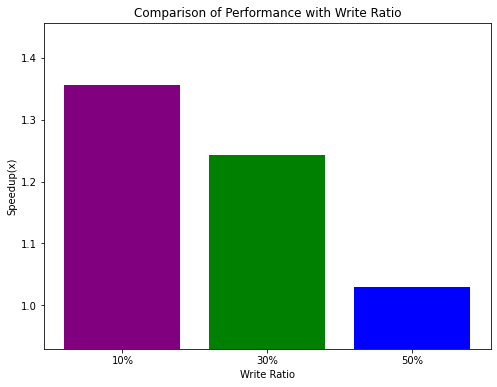

Average Efficiency Factor from File 1: 1.356789498802766
Average Efficiency Factor from File 2: 1.2436595715431367
Average Efficiency Factor from File 3: 1.0296914699512567


In [4]:
# Compare 3-cases [Write Ratio]

import re
import matplotlib.pyplot as plt

def extract_factors(file_path):
    """Extract efficiency factors from the given file."""
    with open(file_path, 'r') as file:
        content = file.read()
    factors = re.findall(r'Dve\+FS:BTA is ([\d\.]+) times faster than BTA', content)
    return [float(factor) for factor in factors]

def compare_factors(file_path1, file_path2, file_path3):
    # Extract factors from both files
    factors1 = extract_factors(file_path1)
    factors2 = extract_factors(file_path2)
    factors3 = extract_factors(file_path3)

    # Calculate the averages
    average_factor1 = sum(factors1) / len(factors1) if factors1 else 0
    average_factor2 = sum(factors2) / len(factors2) if factors2 else 0
    average_factor3 = sum(factors3) / len(factors3) if factors3 else 0

    # Data for plotting
    categories = ['10%', '30%', '50%']
    averages = [average_factor1, average_factor2 , average_factor3]

    # Create a bar chart
    plt.figure(figsize=(8, 6))
    plt.bar(categories, averages, color=['purple', 'green', 'blue'])
    plt.xlabel('Write Ratio')
    plt.ylabel('Speedup(x)')
    plt.title('Comparison of Performance with Write Ratio')
    plt.ylim(min(averages) - 0.1, max(averages) + 0.1)  # Dynamically adjust y-axis for clarity
    plt.show()

    return average_factor1, average_factor2, average_factor3

# Paths to the uploaded files
file_path1 = "C://Users/parks/Downloads/8domains_16banks_lowCycleStep_8threads_10write_50channel.txt"
file_path2 = "C://Users/parks/Downloads/BASELINE8domains_16banks_lowCycleStep_8threads_30write_50channel.txt"
file_path3 = "C://Users/parks/Downloads/8domains_16banks_lowCycleStep_8threads_50write_50channel.txt"

# Extract the factors, compute the averages, and compare
average_factor1, average_factor2, average_factor3  = compare_factors(file_path1, file_path2, file_path3)
print(f"Average Efficiency Factor from File 1: {average_factor1}")
print(f"Average Efficiency Factor from File 2: {average_factor2}")
print(f"Average Efficiency Factor from File 3: {average_factor3}")

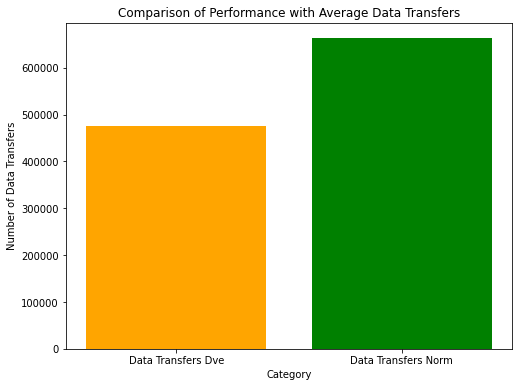

Average Data Transfers Dve: 474950.4
Average Data Transfers Norm: 663226.6


In [5]:
# Number of Data Transfer Comparison

import re
import matplotlib.pyplot as plt

def extract_and_plot_data_transfers(file_path):
    # Open and read the file
    with open(file_path, 'r') as file:
        content = file.read()

    # Use regex to find all instances of the Data Transfers Dve and Data Transfers Norm
    dve_transfers = re.findall(r'Data Transfers Dve: (\d+)', content)
    norm_transfers = re.findall(r'Data Transfers Norm: (\d+)', content)

    # Convert strings to integers
    dve_transfers = [int(transfer) for transfer in dve_transfers]
    norm_transfers = [int(transfer) for transfer in norm_transfers]

    # Calculate the averages
    average_dve = sum(dve_transfers) / len(dve_transfers) if dve_transfers else 0
    average_norm = sum(norm_transfers) / len(norm_transfers) if norm_transfers else 0

    # Data for plotting
    categories = ['Data Transfers Dve', 'Data Transfers Norm']
    averages = [average_dve, average_norm]

    # Create a bar chart
    plt.figure(figsize=(8, 6))
    plt.bar(categories, averages, color=['orange', 'green'])
    plt.xlabel('Category')
    plt.ylabel('Number of Data Transfers')
    plt.title('Comparison of Performance with Average Data Transfers')
    plt.show()

    return average_dve, average_norm

# Path to the uploaded file
file_path = "C://Users/parks/Downloads/BASELINE8domains_16banks_lowCycleStep_8threads_30write_50channel.txt"

# Extract the data, compute the averages, and plot
average_dve, average_norm = extract_and_plot_data_transfers(file_path)
print(f"Average Data Transfers Dve: {average_dve}")
print(f"Average Data Transfers Norm: {average_norm}")

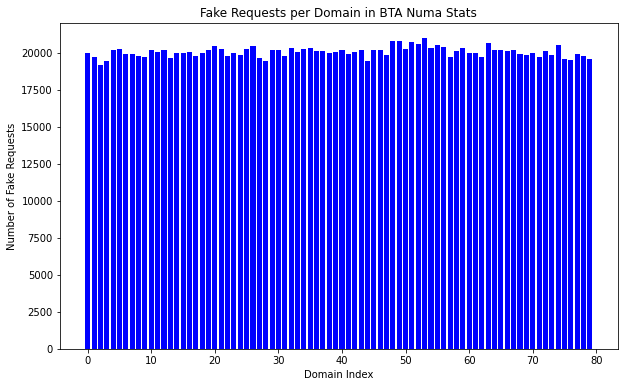

Fake requests per domain: [19996, 19708, 19178, 19452, 20196, 20236, 19932, 19942, 19778, 19740, 20184, 20050, 20208, 19682, 20006, 20012, 20090, 19794, 19976, 20176, 20498, 20252, 19790, 20028, 19882, 20288, 20474, 19682, 19462, 20186, 20174, 19772, 20328, 20094, 20270, 20306, 20112, 20134, 19972, 20096, 20184, 19950, 20030, 20172, 19484, 20194, 20212, 19886, 20800, 20796, 20282, 20716, 20622, 20998, 20302, 20520, 20410, 19740, 20138, 20364, 20000, 20026, 19758, 20684, 20174, 20198, 20102, 20226, 19930, 19840, 19978, 19752, 20146, 19892, 20548, 19610, 19516, 19902, 19762, 19564]


In [6]:
# Fake Request for BTA-NUMA only

import matplotlib.pyplot as plt

def read_and_plot_fake_requests(file_path):
    # Open and read the file
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Initialize a list to hold the fake request values for BTA Numa Stats
    fake_requests_bta = []

    # Flag to check if we are in the BTA Numa Stats section
    in_bta_section = False

    # Loop through each line and extract the fake request values for BTA Numa Stats
    for line in lines:
        if 'BTA Numa Stats:' in line:
            in_bta_section = True
        elif 'Dve+FS-BTA Stats:' in line:
            in_bta_section = False  # Exit section when reaching the next stats block

        if in_bta_section and 'fake requests:' in line:
            # Extract the number of requests
            requests = int(line.split(':')[-1].strip())
            fake_requests_bta.append(requests)

    # Create a bar chart for the fake requests in BTA Numa Stats
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(fake_requests_bta)), fake_requests_bta, color='blue')
    plt.xlabel('Domain Index')
    plt.ylabel('Number of Fake Requests')
    plt.title('Fake Requests per Domain in BTA Numa Stats')
    plt.show()

    return fake_requests_bta

# Path to the uploaded file
file_path = "C://Users/parks/Downloads/BASELINE8domains_16banks_lowCycleStep_8threads_30write_50channel.txt"  # Update the path to the file you uploaded

# Call the function to read and plot data
fake_requests_data = read_and_plot_fake_requests(file_path)
print("Fake requests per domain:", fake_requests_data)

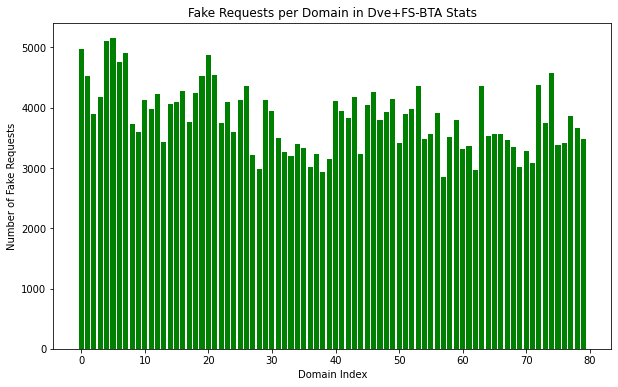

Fake requests per domain for Dve+FS-BTA: [4974, 4522, 3888, 4170, 5108, 5154, 4752, 4908, 3722, 3604, 4126, 3982, 4234, 3434, 4054, 4094, 4282, 3756, 4242, 4528, 4876, 4546, 3752, 4092, 3594, 4122, 4360, 3220, 2988, 4128, 3952, 3494, 3270, 3206, 3402, 3324, 3020, 3240, 2940, 3152, 4118, 3940, 3832, 4186, 3232, 4040, 4260, 3800, 3936, 4138, 3414, 3904, 3986, 4362, 3476, 3568, 3914, 2854, 3510, 3800, 3322, 3372, 2968, 4356, 3526, 3558, 3556, 3466, 3352, 3016, 3278, 3090, 4382, 3750, 4574, 3382, 3422, 3858, 3666, 3488]


In [7]:
# Fake Request for Dve+FS-BTA only

import matplotlib.pyplot as plt

def read_and_plot_fake_requests_dve(file_path):
    # Open and read the file
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Initialize a list to hold the fake request values for Dve+FS-BTA Stats
    fake_requests_dve = []

    # Flag to check if we are in the Dve+FS-BTA Stats section
    in_dve_section = False

    # Loop through each line and extract the fake request values for Dve+FS-BTA Stats
    for line in lines:
        if 'Dve+FS-BTA Stats:' in line:
            in_dve_section = True
        elif 'BTA Numa Stats:' in line:
            in_dve_section = False  # Exit section when reaching the next stats block

        if in_dve_section and 'fake requests:' in line:
            # Extract the number of requests
            requests = int(line.split(':')[-1].strip())
            fake_requests_dve.append(requests)

    # Create a bar chart for the fake requests in Dve+FS-BTA Stats
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(fake_requests_dve)), fake_requests_dve, color='green')
    plt.xlabel('Domain Index')
    plt.ylabel('Number of Fake Requests')
    plt.title('Fake Requests per Domain in Dve+FS-BTA Stats')
    plt.show()

    return fake_requests_dve

# Path to the uploaded file
file_path = "C://Users/parks/Downloads/BASELINE8domains_16banks_lowCycleStep_8threads_30write_50channel.txt"  # Update the path to the file you uploaded

# Call the function to read and plot data
fake_requests_data_dve = read_and_plot_fake_requests_dve(file_path)
print("Fake requests per domain for Dve+FS-BTA:", fake_requests_data_dve)